# Домашняя работа "Оценка точности модели, переобучение, регуляризация"
## Задание
Посчитать tpr и fpr в ноутбуке к лекции. Убедиться, что график ROC AUC получается таким же, как и штатными средствами.

Построить график Precision - Recall на этих же данных.

In [1]:
import pandas as pd

In [2]:
# Данные содержат признаки пользователей и целевую переменную affair - была ли связь на стороне
data = pd.read_csv('affair_data.csv')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affair           6366 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 447.7 KB


In [5]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [8]:
#формируем набор признаков и целевую переменную
X = data[data.columns[:-1]]
X.head(2)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0


In [10]:
Y = data['affair']

### Построим две модели

In [15]:
model = LogisticRegression()
model_tree = DecisionTreeClassifier()

In [16]:
#Разбиваем данные на обущаю и тестовую выборку в соотношении 70/30
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [17]:
#обучаем модель
model.fit(X_train, Y_train)

LogisticRegression()

In [18]:
model_tree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [42]:
# получаем прогнозные значения модели
predictions_model = model.predict_proba(X_test)

In [159]:
pred_model = model.predict(X_test)
pred_model

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [43]:
predictions_model

array([[0.37442488, 0.62557512],
       [0.92523133, 0.07476867],
       [0.68436964, 0.31563036],
       ...,
       [0.54059869, 0.45940131],
       [0.79790213, 0.20209787],
       [0.77284695, 0.22715305]])

In [44]:
predictions_model[:, 1]

array([0.62557512, 0.07476867, 0.31563036, ..., 0.45940131, 0.20209787,
       0.22715305])

In [161]:
predictions_model_tree = model_tree.predict_proba(X_test)

In [162]:
pred_model_tree = model_tree.predict(X_test)

In [39]:
predictions_model_tree

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]])

### Оценим качество моделей на обучении и обобщении

In [28]:
# оценка точности моделей
# на обучение
model.score(X_train, Y_train)

0.7235188509874326

In [29]:
model_tree.score(X_train, Y_train)

0.9497307001795332

In [30]:
#оценка точности моделей
# на обобщение
model.score(X_test, Y_test)

0.7319371727748691

In [31]:
model_tree.score(X_test, Y_test)

0.6575916230366492

### Проведём оценку точности моделей
### Точность для логистической регрессии

In [52]:
# проведём оценку точности моделей
# посчитаем accuracy для каждой модели

tp = 0 # True Positive
tn = 0 # True Negative
fp = 0 # False Positive
fn = 0 # False Negative

# для линейной регрессии (как бы строит таблицу 2х2 определяя верные и неверные предсказания, ошибки 1 и 2 рода)

for predicted_values, fact in zip ( predictions_model[:, 1], Y_test ):
    if predicted_values >=0.5:
        predicted = 1
    else:
        predicted = 0
        
    if predicted == 1:
        if fact == 1:
            tp += 1
        else:
            fp += 1
    else:
        if fact == 1:
            fn += 1
        else:
            tn += 1

In [53]:
tp, fp, fn, tn

(226, 131, 381, 1172)

In [55]:
# рассчитаем критерий accuracy
accuracy_model = (tp + tn) / (tp + tn + fp + fn)
accuracy_model

0.7319371727748691

In [56]:
# рассчитаем другие критерии точности модели: precision, recall
precision_model = tp / (tp + fp)
precision_model

0.6330532212885154

In [58]:
recall_model = tp / (tp + fn)
recall_model

0.3723228995057661

In [59]:
# расчёт этих же критериев при помощи библиотеки
from sklearn.metrics import recall_score, precision_score

In [65]:
recall_score(Y_test, pred_model)

0.3723228995057661

In [66]:
precision_score(Y_test, pred_model)

0.6330532212885154

In [70]:
tpr = tp / (tp + fn)
tpr

0.3723228995057661

In [71]:
fpr = fp / (fp + tn)
fpr

0.10053722179585571

### Точность для модели дерева

In [177]:
tp2 = 0 # True Positive
tn2 = 0 # True Negative
fp2 = 0 # False Positive
fn2 = 0 # False Negative

# для дерева
for predicted_values2, fact2 in zip ( predictions_model_tree[:, 1], Y_test ):
        
    if predicted_values2 == 1:
        if fact2 == 1:
            tp2 += 1
        else:
            fp2 += 1
    else:
        if fact2 == 1:
            fn2 += 1
        else:
            tn2 += 1

In [178]:
tp2, fp2, fn2, tn2

(427, 97, 164, 1222)

In [179]:
# рассчитаем критерий accuracy
accuracy_model2 = (tp2 + tn2) / (tp2 + tn2 + fp2 + fn2)
accuracy_model2

0.8633507853403142

In [180]:
# рассчитаем другие критерии точности модели: precision, recall
precision_model2 = tp2 / (tp2 + fp2)
precision_model2

0.8148854961832062

In [181]:
recall_model2 = tp2 / (tp2 + fn2)
recall_model2

0.7225042301184433

In [182]:
recall_score(Y_test, pred_model_tree)

0.7411167512690355

In [183]:
precision_score(Y_test, pred_model_tree)

0.8007312614259597

### Проведём оценку точности модели логистической регрессии для разных пороговых значений и разных критериев 

In [139]:
tpr_arr = []
fpr_arr = []
precision_arr = []
recall_arr = []
tp = 0 # True Positive
tn = 0 # True Negative
fp = 0 # False Positive
fn = 0 # False Negative
# для линейной регрессии (как бы строит таблицу 2х2 определяя верные и неверные предсказания, ошибки 1 и 2 рода)
for i in [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.98]:
    for predicted_values, fact in zip ( predictions_model[:, 1], Y_test ):
        if predicted_values >=i:
            predicted = 1
        else:
            predicted = 0
        if predicted == 1:
            if fact == 1:
                tp += 1
            else:
                fp += 1
        else:
            if fact == 1:
                fn += 1
            else:
                tn += 1
    tpr_arr.append( tp / (tp + fn))
    fpr_arr.append( fp / (fp + tn))
    precision_arr.append( tp / (tp + fp))
    recall_arr.append( tp / (tp + fn))

In [140]:
import matplotlib.pyplot as plt

In [141]:
# посчитаем ROC-кривую (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve

In [142]:
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve( Y_test, predictions_model[:, 1] )

In [143]:
for line in zip( fpr[:10], tpr[:10], thres[:10] ):
    print( line )

(0.0, 0.0, 1.9395896155858554)
(0.0, 0.001692047377326565, 0.9395896155858555)
(0.0, 0.00338409475465313, 0.9295430245802121)
(0.002274450341167551, 0.00338409475465313, 0.9005986906337106)
(0.002274450341167551, 0.015228426395939087, 0.8777569451212546)
(0.0037907505686125853, 0.015228426395939087, 0.8714299157725439)
(0.0037907505686125853, 0.018612521150592216, 0.8685153133006547)
(0.00530705079605762, 0.018612521150592216, 0.8658004679989755)
(0.00530705079605762, 0.025380710659898477, 0.8570710472644959)
(0.006065200909780136, 0.025380710659898477, 0.8562239664192318)


In [144]:
from sklearn.metrics import roc_auc_score

In [145]:
roc_auc_score( Y_test, predictions_model[:, 1] )

0.7492530746130035

In [146]:
# метод для построения графика precision-recall
from sklearn.metrics import precision_recall_curve

In [147]:
pr, re, thres = precision_recall_curve( Y_test, predictions_model[:, 1] )

In [148]:
# посмотрим что получилось
for line in zip( pr[:10], re[:10], thres[:10] ):
    print( line )

(0.31655061596143547, 1.0, 0.08189340425507904)
(0.3161843515541265, 0.9983079526226735, 0.08203256334894363)
(0.3163538873994638, 0.9983079526226735, 0.08300962392568752)
(0.3165236051502146, 0.9983079526226735, 0.08338476168625017)
(0.3166935050993022, 0.9983079526226735, 0.08346658292629466)
(0.31686358754027927, 0.9983079526226735, 0.08379199492602783)
(0.31703385276732937, 0.9983079526226735, 0.08384359696108468)
(0.3172043010752688, 0.9983079526226735, 0.08441535520735152)
(0.31737493275954815, 0.9983079526226735, 0.08451379153366986)
(0.317545748116254, 0.9983079526226735, 0.08459254320010662)


In [149]:
from sklearn.metrics import average_precision_score

In [150]:
# площадь под кривой
average_precision_score( Y_test, predictions_model[:, 1] )

0.549479884029568

### график Precision - Recall для ручных данных и библиотечных

Text(0, 0.5, 'Recall')

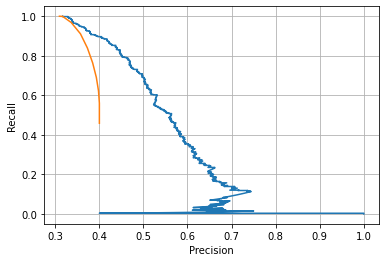

In [168]:
plt.plot(pr,re) #библиотечный расчёт
plt.grid()
plt.plot(precision_arr, recall_arr)#ручной расчёт
plt.xlabel('Precision')
plt.ylabel('Recall')

### график ROC для ручных данных и библиотечных

Text(0, 0.5, 'True Positive Rate')

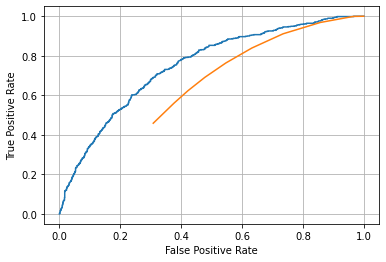

In [166]:
plt.plot( fpr, tpr ) #библиотечный расчёт
plt.grid()
plt.plot(fpr_arr, tpr_arr) #ручной расчёт
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [ ]:
# вывод данные графики расходятся при ручном и библиотечном расчёте, возможно, при ручном расчёте есть какая-либо ошибка